In [17]:
import numpy as np

# Univariate

In [59]:
seq = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [60]:
n_steps = 4

In [61]:
def create_sequence(seq, n_steps):
    X, y = [], []

    for i in range(len(seq)):
        end_ix = i+n_steps

        if end_ix > len(seq)-1:
            break

        seq_x, seq_y = seq[i:end_ix], seq[end_ix]

        X.append(seq_x)
        y.append(seq_y)

    return np.array(X), np.array(y)

In [62]:
X, y = create_sequence(seq, n_steps)

In [63]:
X

array([[ 0, 10, 20, 30],
       [10, 20, 30, 40],
       [20, 30, 40, 50],
       [30, 40, 50, 60],
       [40, 50, 60, 70],
       [50, 60, 70, 80],
       [60, 70, 80, 90]])

In [64]:
y

array([ 40,  50,  60,  70,  80,  90, 100])

In [65]:
for a, b in zip(X, y):
    print(a, b)

[ 0 10 20 30] 40
[10 20 30 40] 50
[20 30 40 50] 60
[30 40 50 60] 70
[40 50 60 70] 80
[50 60 70 80] 90
[60 70 80 90] 100


In [66]:
X.shape

(7, 4)

In [67]:
y.shape

(7,)

In [68]:
import tensorflow as tf 

In [69]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(100, activation='relu', input_shape=(4, 1)),
    tf.keras.layers.Dense(1)
])

In [70]:
model.compile(optimizer='adam', loss='mse')

In [71]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               40800     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [72]:
history = model.fit(X, y, epochs=2000, verbose=0)

In [73]:
import matplotlib.pyplot as plt

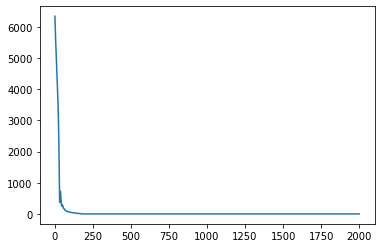

In [74]:
plt.plot(list(range(1, len(history.history['loss'])+1)), history.history['loss'])

In [79]:
test_X = np.array([60, 70, 80, 90])

In [80]:
test_X = test_X.reshape((1, 4, 1))

In [81]:
test_X

array([[[60],
        [70],
        [80],
        [90]]])

In [82]:
model.predict(test_X)

array([[100.00159]], dtype=float32)

# Multivariate

In [111]:
X1 = [10, 20, 30, 40, 50, 60, 70, 80, 90]
X2 = [15, 25, 35, 45, 55, 65, 75, 85, 95]

In [112]:
y = np.array([X1[i]+X2[i] for i in range(len(X1))])

In [113]:
y

array([ 25,  45,  65,  85, 105, 125, 145, 165, 185])

In [114]:
X1 = np.array(X1).reshape((len(X1), 1))
X2 = np.array(X2).reshape((len(X2), 1))
y = np.array(y).reshape((len(y), 1))

In [115]:
data = np.hstack((X1, X2, y))

In [116]:
data

array([[ 10,  15,  25],
       [ 20,  25,  45],
       [ 30,  35,  65],
       [ 40,  45,  85],
       [ 50,  55, 105],
       [ 60,  65, 125],
       [ 70,  75, 145],
       [ 80,  85, 165],
       [ 90,  95, 185]])

In [117]:
def create_multivariate_sequence(seq, n_steps):
    X, y = [], []

    for i in range(len(seq)):
        end_ix = i+n_steps

        if end_ix > len(seq):
            break

        seq_x, seq_y = seq[i:end_ix, :-1], seq[end_ix-1, -1]

        X.append(seq_x)
        y.append(seq_y)

    return np.array(X), np.array(y)

In [118]:
n_steps=4

In [119]:
X, y = create_multivariate_sequence(data, n_steps)

In [120]:
for a, b in zip(X, y):
    print(a, b)

[[10 15]
 [20 25]
 [30 35]
 [40 45]] 85
[[20 25]
 [30 35]
 [40 45]
 [50 55]] 105
[[30 35]
 [40 45]
 [50 55]
 [60 65]] 125
[[40 45]
 [50 55]
 [60 65]
 [70 75]] 145
[[50 55]
 [60 65]
 [70 75]
 [80 85]] 165
[[60 65]
 [70 75]
 [80 85]
 [90 95]] 185


In [121]:
X.shape

(6, 4, 2)

In [122]:
n_inputs = X.shape[1]*X.shape[2]

In [123]:
X = X.reshape((X.shape[0], n_inputs))

In [124]:
X

array([[10, 15, 20, 25, 30, 35, 40, 45],
       [20, 25, 30, 35, 40, 45, 50, 55],
       [30, 35, 40, 45, 50, 55, 60, 65],
       [40, 45, 50, 55, 60, 65, 70, 75],
       [50, 55, 60, 65, 70, 75, 80, 85],
       [60, 65, 70, 75, 80, 85, 90, 95]])

In [145]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_dim=n_inputs),
    tf.keras.layers.Dense(1)
])

In [146]:
model.compile(optimizer='adam', loss='mse')

In [147]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 100)               900       
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
_________________________________________________________________


In [148]:
history = model.fit(X, y, epochs=2000, verbose=0)

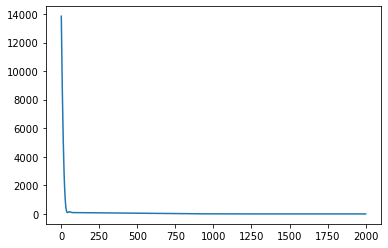

In [149]:
plt.plot(list(range(1, len(history.history['loss'])+1)), history.history['loss'])

In [150]:
X_test = np.array([[70, 75], [80, 85], [90, 95], [100, 105]])
X_test = X_test.reshape((1, n_inputs))

In [151]:
model.predict(X_test)

array([[205.42964]], dtype=float32)